In [41]:
import pandas as pd

In [42]:
penguins = pd.read_csv('penguin-iter.csv')

In [43]:
sorted?

In [44]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [45]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [46]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


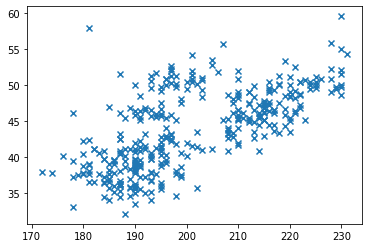

In [47]:
from matplotlib import pyplot as plt

plt.scatter(penguins['Flipper Length (mm)'], penguins['Culmen Length (mm)'],marker = 'x')



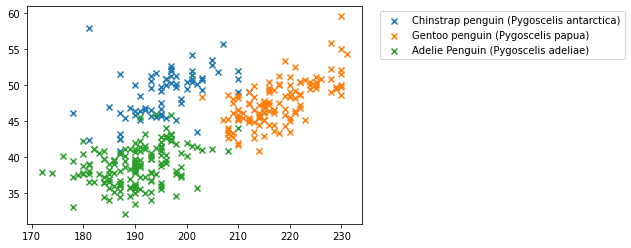

In [59]:

adelie = penguins[penguins['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
chinstrap = penguins[penguins['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
gentoo = penguins[penguins['Species'] == 'Gentoo penguin (Pygoscelis papua)']

for species in set(penguins['Species']):
    plt.scatter(penguins[penguins['Species']==species]['Flipper Length (mm)'], penguins[penguins['Species']==species]['Culmen Length (mm)'],\
               label = species, marker = 'x')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [60]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split

In [61]:
data = penguins[['Species','Culmen Length (mm)','Flipper Length (mm)']]
type(data)

pandas.core.frame.DataFrame

In [62]:
data = data.dropna()
type(data)

pandas.core.frame.DataFrame

In [63]:
train, test = train_test_split(data)
test = test.copy()
model = knn()



In [64]:
model.fit(train.drop(columns=['Species']), train['Species'])

KNeighborsClassifier()

In [65]:
from sklearn.metrics import accuracy_score
yhat = model.predict(test.drop(columns=['Species']))
acc = accuracy_score(test['Species'], yhat)

In [66]:
print(acc)

0.9186046511627907


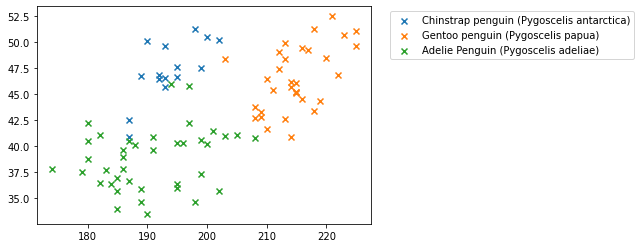

In [67]:
for species in set(test['Species']):
    plt.scatter(test[test['Species']==species]['Flipper Length (mm)'], test[test['Species']==species]['Culmen Length (mm)'],\
               label = species, marker ='x')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

test['pred'] = list(yhat)


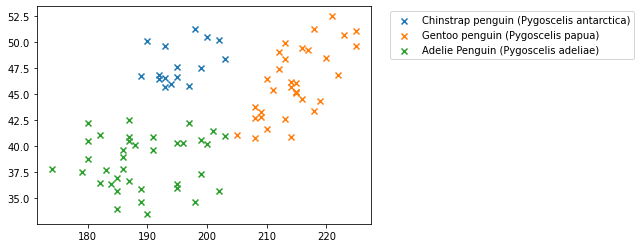

In [69]:
for species in set(test['Species']):
    plt.scatter(test[test['pred']==species]['Flipper Length (mm)'], test[test['pred']==species]['Culmen Length (mm)'],\
               label = species, marker = 'x')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [ ]:
# Plotting decision regions
x_min, x_max = test.drop(columns=['Species'])[:, 0].min() - 1, test.drop(columns=['Species'])[:, 0].max() + 1
y_min, y_max = test.drop(columns=['Species'])[:, 1].min() - 1, test.drop(columns=['Species'])[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(figsize=(10, 8))


Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], c=y,
                              s=20, edgecolor='k')

plt.show()
